In [26]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import glob
import json
import time
import datetime as dt
import calendar
from tqdm import tqdm
import datetime as dt
import matplotlib.pyplot as plt
import ast
import collections
from geopy.distance import geodesic
import geopandas
import csv
from fastkml import kml
from shapely.geometry import Polygon
from matplotlib.patches import Polygon as PolygonPatch
from matplotlib.collections import PatchCollection
import scipy
from matplotlib.colors import LogNorm

In [25]:
pip install fastkml

     ---------------------------------------- 62.7/62.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pygeoif: filename=pygeoif-0.7-py3-none-any.whl size=19000 sha256=0a3f69df6b2a0bb286e03dbbf1387e836475ba46ba020f547fb6095e1b70796a
  Stored in directory: c:\users\simra\appdata\local\pip\cache\wheels\1f\03\f4\8041459258b17a1bc9c057a947cc1841a21084b8c8f06877c3
Successfully built pygeoif
Note: you may need to restart the kernel to use updated packages.


In [31]:
places_data = {'code':[],'name':[],'density':[]}
with open('./KS101EW_LA.csv','r') as csvfile:
    line = csv.reader(csvfile,delimiter=',',quotechar='"')
    next(line)
    for row in line:
        place['code'].append(row[2])
        place['name'].append(row[1])
        place['density'].append(float(row[-1]))
map_df = pd.DataFrame(place)

In [32]:
map_df

,code,name,density
0,E06000005,Darlington,5.3
1,E06000047,County Durham,2.3
2,E06000001,Hartlepool,9.8
3,E06000002,Middlesbrough,25.7
4,E06000057,Northumberland,0.6
...,...,...,...
691,W06000018,Caerphilly,6.4
692,W06000019,Blaenau Gwent,6.4
693,W06000020,Torfaen,7.2
694,W06000021,Monmouthshire,1.1


In [33]:
map_df.head(5)

,code,name,density
0,E06000005,Darlington,5.3
1,E06000047,County Durham,2.3
2,E06000001,Hartlepool,9.8
3,E06000002,Middlesbrough,25.7
4,E06000057,Northumberland,0.6


In [34]:
with open('./Local_Authority_Districts__December_2015__Boundaries.kml.xml','r',encoding='utf-8') as file:
    tmp = file.read()
k_value = kml.KML()
k_value.from_string(tmp)
docx = list(k_value.features())
val = list(docx[0].features())
data = list(val[0].features())
polygon_data = {}
for p in data:
    polygon = p.geometry
    for d in p.extended_data.elements[0].data:
        if d['name'] == 'lad15cd':
            id_code = d['value']
        if d['name'] == 'lad15nm':
            name = d['value']
    polygon_data[id_code] = polygon

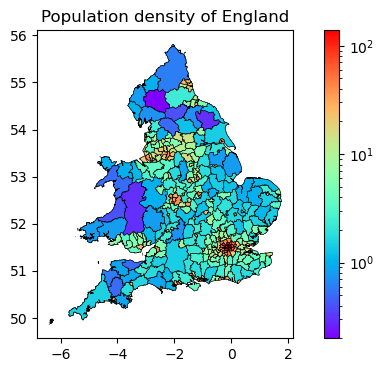

In [49]:
geo_data = [polygon_data[i] for i in map_df['code']]
gpd = geopandas.GeoDataFrame(map_df,crs='EPSG:4326',geometry=geo_data)
gpd.plot('density',legend=True,cmap='rainbow',edgecolor='black',linewidth=0.4,
         norm=LogNorm(vmin=gdf['density'].min(),vmax=gdf['density'].max()),figsize=(8,4))
plt.title('Population density of England')
plt.show()